In [51]:
!pip install selenium

In [52]:
import pandas as pd
import selenium
from selenium import webdriver
import time
from selenium.common.exceptions import NoSuchElementException

In [166]:
driver = webdriver.Chrome("Chromedriver.exe")
url = "https://www.amazon.in/"
driver.get(url)

In [167]:
#clicking on vertical products
time.sleep(5)
Product_button = driver.find_element_by_xpath("/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[1]/div/div/select/option[31]")
Product_button.click()

In [168]:
time.sleep(5)
#locating the search bar
search_bar = driver.find_element_by_id("twotabsearchtextbox")    # Locating searc_bar by id
search_bar.clear()                                               # clearing search_bar
search_bar.send_keys("Guitars")                                   # sending user input to search bar
search_button = driver.find_element_by_xpath('//span[@id="nav-search-submit-text"]')       # Locating search_button by xpath
search_button.click() 

In [170]:
#Scrapping Titles
Titles=[]
titles=driver.find_elements_by_xpath("//span[@class='a-size-base-plus a-color-base a-text-normal']")
for i in titles:
    Titles.append(i.text)

In [171]:
len(Titles)

62

In [172]:
#scrapping Price
Price=[]
prices=driver.find_elements_by_xpath("//span[@class='a-price-whole']")
for i in prices:
    Price.append(i.text)

In [173]:
len(Price)

61

In [181]:
urls = []
no_of_ratings=[]
Availability=[]
Other_Details=[]
Return_Exchange=[]
Delivery_date=[]


#locating Ratings
Ratings=[]
urls=driver.find_elements_by_xpath("//a[@class='a-link-normal a-text-normal']")
UR=[]
for i in urls:
    UR.append(i.get_attribute('href'))
for url in UR:
    driver.get(url)
    try:                  
        rating=driver.find_element_by_xpath("//span[@class='a-size-base a-nowrap']//span")
        Ratings.append(rating.text)
        
    except NoSuchElementException:
        Ratings.append("NO rating")


 #Extracting No of Ratings from xpath
    try:
        no_rating = driver.find_element_by_id('acrCustomerReviewText')    
        no_of_ratings.append(no_rating.text)
    except NoSuchElementException:
        no_of_ratings.append('-')
        
# Extracting Availability from xpath         
    try:
        avl= driver.find_element_by_xpath('//span[@class="a-size-medium a-color-success"]')  
        Availability.append(avl.text)
    except NoSuchElementException:
        Availability.append('-')
        
# Extracting Other Details from xpath    
    try:
        othr_dtls= driver.find_element_by_xpath('//ul[@class="a-unordered-list a-vertical a-spacing-mini"]')  
        Other_Details.append(othr_dtls.text)
    except NoSuchElementException:
        Other_Details.append('-')
        
#extracting Return/Exchange
    try:
        R_exchange = driver.find_element_by_xpath("//div[@class='a-section a-spacing-none icon-content']//a")    
        Return_Exchange.append(R_exchange.text)
    except NoSuchElementException:
        Return_Exchange.append('-')
        
#extracting delivery date
    try:
        D_date = driver.find_element_by_xpath("//div[@class='a-section a-spacing-mini']//b")    
        Delivery_date.append(D_date.text)
    except NoSuchElementException:
        Delivery_date.append('-')
    
        

In [190]:
len(Availability)

62

In [191]:
Guitar=pd.DataFrame({'Title':Titles[:61],
                'Price':Price[:61],
                'No.of Ratings':no_of_ratings[:61],
                'Availablity':Availability[:61],
                'Other Details':Other_Details[:61],
                'Ratings':Ratings[:61],
                'Product urls':urls[:61],
                'Delivery date':Delivery_date[:61],
                'Return Exchange':Return_Exchange[:61]})
Guitar

,Title,Price,No.of Ratings,Availablity,Other Details,Ratings,Product urls,Delivery date,Return Exchange
0,Kadence Frontier Jumbo Semi Acoustic Guitar Wi...,"6,999",930 ratings,In stock.,QUALITY STRINGS ---The surface is coated with ...,3.9 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,"Sunday, Aug 1",Pay on Delivery
1,Medellin MED-BLU-C Linden Wood Acoustic Guitar,"2,399",473 ratings,In stock.,Material: Wood\nColour: Blue\nAcoustic Guitar,3.9 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,"Thursday, July 29",Pay on Delivery
2,Kadence Acoustica Series Semi Acoustic Ash Woo...,"7,199",605 ratings,In stock.,Product Type : Acoustic Guitar Fretboard mater...,3.9 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,"Saturday, July 31",Pay on Delivery
3,GUITAR BRO - COMBO (Black Acoustic Guitar for ...,"6,499",26 ratings,In stock.,GUITAR BRO +20 mins FREE VIDEO Demo - is a lea...,3.6 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,July 30 - Aug 3,7 Days Replacement
4,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...","2,649","11,422 ratings",In stock.,"Black Glossy Finish, Number of Frets: 18, Acou...",3.9 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,"Thursday, July 29",Pay on Delivery
...,...,...,...,...,...,...,...,...,...
56,Divyatamall 22 inches 4 String Wooden Finish A...,799,3 ratings,In stock.,rossewood natural high glossy acoustic guitar\...,4 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,July 31 - Aug 1,7 Days Replacement
57,PRAHANT 4 String Mini Guitar Children's Musica...,588,11 ratings,In stock.,Dreadnought body style Spruce top with scallop...,3.1 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,"Friday, July 30",7 Days Replacement
58,Tuner Clip on Chromatic Guitar Bass Violin Uku...,499,2 ratings,In stock.,◆ GREAT FOR BEGINNERS\n◆ PROVIDES SCREEN FREE ...,2.8 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,"Friday, July 30",7 Days Replacement
59,DIKUJI ENTERPRISE Classical Series Guitar Musi...,499,3 ratings,In stock.,Rich Colors and Thickness Guitar picks can mak...,2.7 out of 5,<selenium.webdriver.remote.webelement.WebEleme...,"Friday, July 30",7 Days Replacement


In [192]:
#saving as CSV file
Guitar.to_csv('data.xls',index=False)

In [101]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://images.google.com/?gws_rd=ssl"
driver.get(url)


In [102]:
Search_job = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
Search_job.send_keys("fruits")

In [103]:
time.sleep(2)
#locating the button and clicking 
button=driver.find_element_by_class_name('FAuhyb')
button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsRLK-La6p9LPjx5MkCD7KjZ2PFQY8XNX0YA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRHuZrTbdci-8ElGzgIh_W6sJeV9VOBeT3NiA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS62r1-dyhhAiaOPeU9qZzlAGrbmoTygqATCQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTYRn-Emn3lR4WiglVrDx69oghAW7W8Al-26g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSt0K1iLAfz0W2NeZk0OW_Orah2AlvzURw8Tw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ4bZ8DbxzGHQO_xpJIHFwUWVKNraRdVme-QQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQlCy3oYbyuVFpu_1gPqRsxYmFnuhD8TyY33w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR6SjYxZXy_JKZ6NhUw1ZlY2uLry91NcHxN6A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTls-whrQZSb3
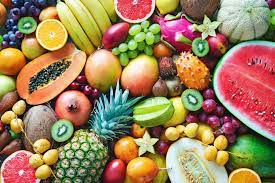
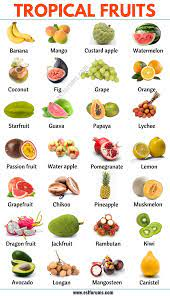
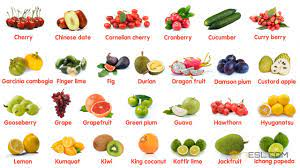
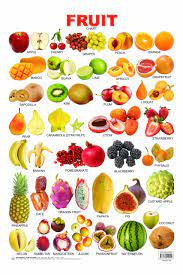
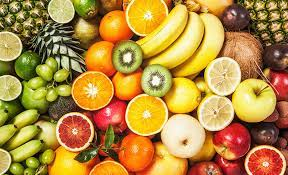
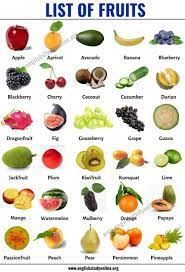
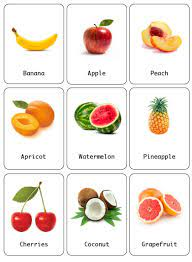
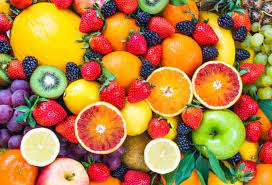
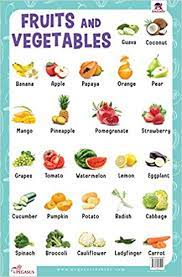
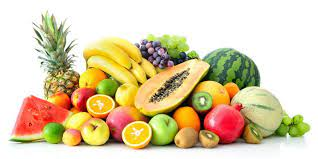
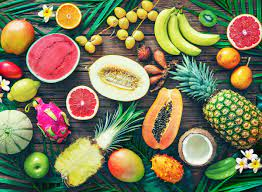
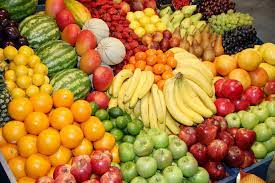
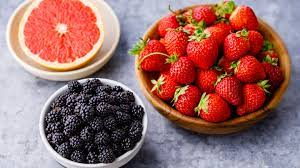
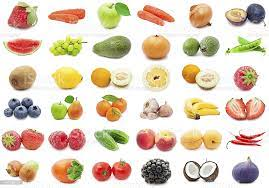
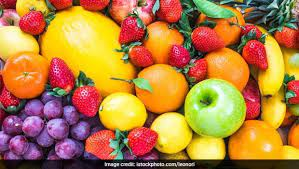
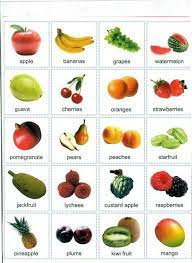
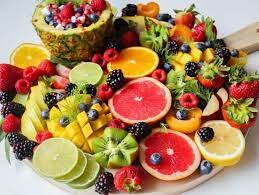
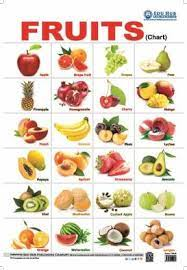
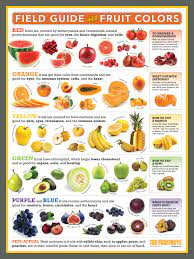
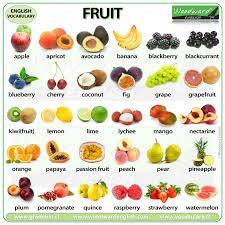

In [109]:
time.sleep(3)
#scrapping the required details
url=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']//img")
url

img_fruits=[]
for i in url:
    img_fruits.append(i.get_attribute("src"))
img_fruits

In [110]:
len(img_fruits)

300

In [111]:
#scraping cars image
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://images.google.com/?gws_rd=ssl"
driver.get(url)

Search_job = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
Search_job.send_keys("Cars")

In [112]:
time.sleep(2)
#locating the button and clicking 
button=driver.find_element_by_class_name('FAuhyb')
button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkoEVfwcUsb704-CldU0d4Kexj8se3fX_CeA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNy62ADY6qhNzvuqBxhw7Tr2CWpg1jtiGVYw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSyMurcEluQ5blOUZgaUN_RAAsFJYgp37mLXQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQFQD8FHJ2cf_3_trxiRLElMRBl6yHz--OmJA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTxbjXwkwVr-14A0KU5__5zZb-b5nUEyJv2Rg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTkwGXQDS6Q-IVLhKWrdyaHw8WYNgWTE2juJQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS9tNWA9jrkFikCj-_MtuDBIesg2APINoXApg&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQIeD6lpmutS_PTGYrNxYAsa2P7HZD-0uAA7g&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPTXYOJCG-Nm
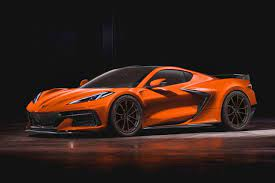
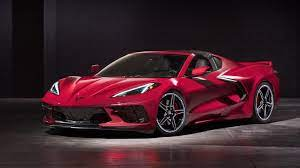
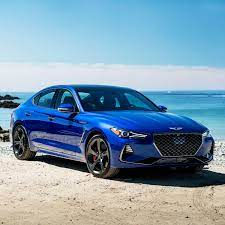
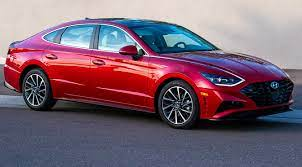
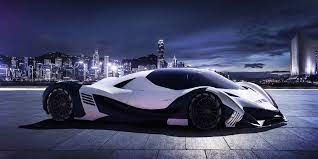
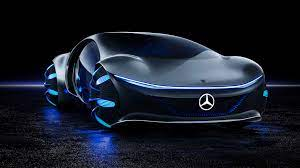
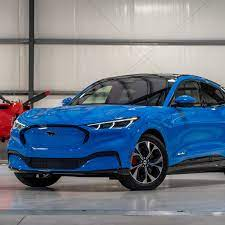
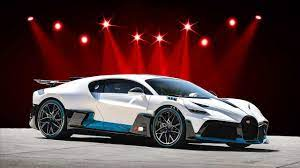
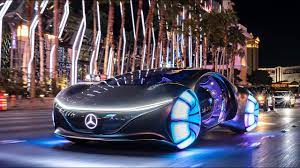
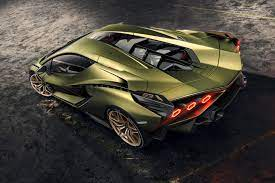
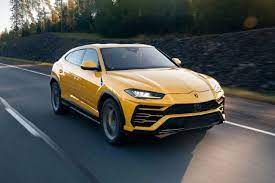
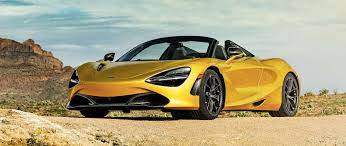
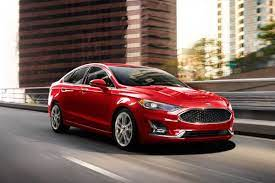
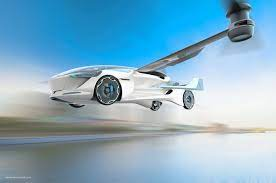
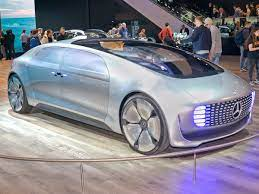
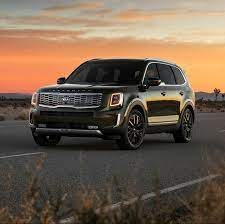
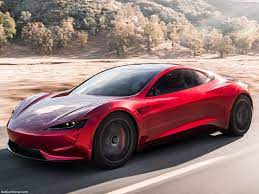
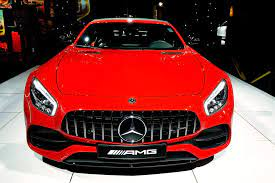
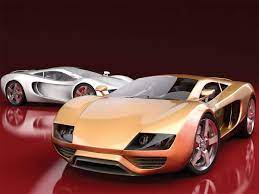
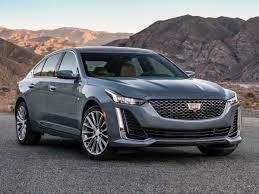

In [114]:
time.sleep(3)
#scrapping the required details
url=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']//img")
url

img_cars=[]
for i in url:
    img_cars.append(i.get_attribute("src"))
img_cars

In [115]:
len(img_cars)

300

In [116]:
#scraping Machine learning image
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://images.google.com/?gws_rd=ssl"
driver.get(url)

Search_job = driver.find_element_by_xpath('//input[@class="gLFyf gsfi"]')
Search_job.send_keys("Machine Learning")

time.sleep(10)
#locating the button and clicking 
button=driver.find_element_by_class_name('FAuhyb')
button.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR1VXGCyLKk_U8qzQ31abMiOSM3lg953_Qw3A&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSRkU62g7Rhz3aNupBoOc6pizY-19hH9-MJKA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ5LFpAD-FPmniqb8OCMo64l4q87A37IN6UMQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQ-qD2rRXFGMce45la7pokLMZpwRAad6sZKAw&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRvrLOYzDpbFNPnpVcM10KGQWzibR5O9MAGcA&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQSYylHvRw4uZOGozJG1VYgdMReGDGuxSwxPQ&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTba5qkPbfxaExGGfEhcujsY708WyfHopDV8w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTOSwX0K0UGwBx3QEEuA4jYokxrs2iTEl9R6w&usqp=CAU',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQh4HzGIRo74W
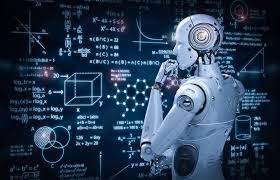
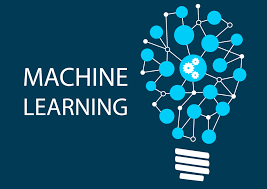
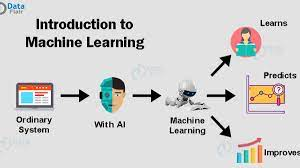
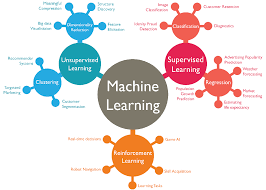
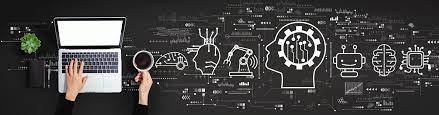
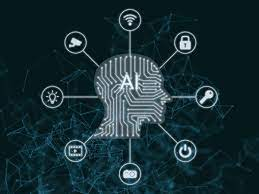
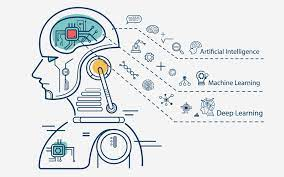
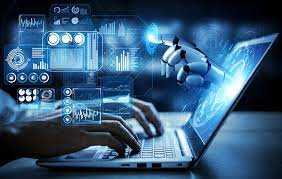
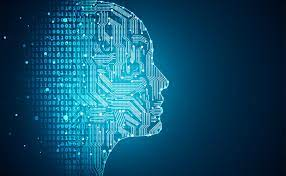
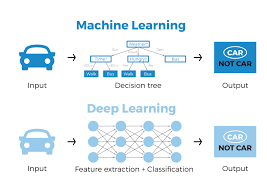
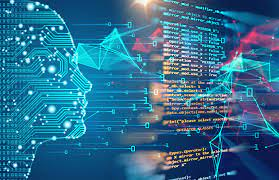
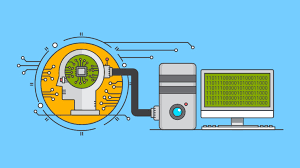
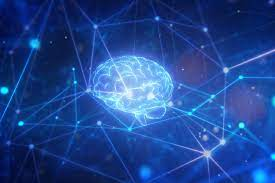
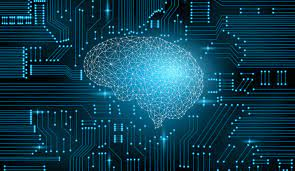
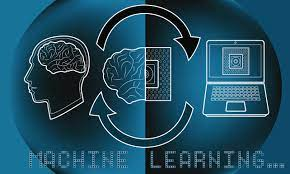
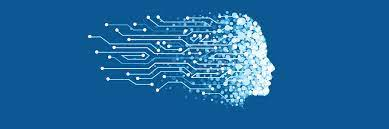
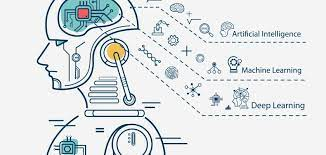
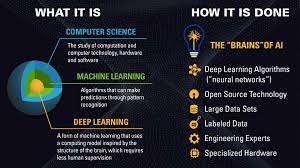
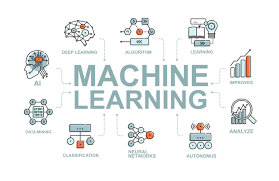
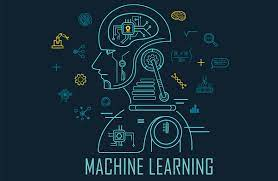

In [122]:
time.sleep(3)
#scrapping the required details
url=driver.find_elements_by_xpath("//div[@class='bRMDJf islir']//img")
url

img_ML=[]
for i in url:
    img_ML.append(i.get_attribute("src"))
img_ML

In [123]:
len(img_ML)

300

In [124]:
df=pd.DataFrame({'Fruits IMG':img_fruits[:100],
                'CArs IMG':img_cars[:100],
                'Machine Learning':img_ML[:100]})
df

,Fruits IMG,CArs IMG,Machine Learning
0,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
1,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
2,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
3,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA..."
4,"data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA...","data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQA..."
...,...,...,...
95,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
96,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
97,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...
98,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [3]:
# Importing Libraries
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

# Importing selenium webdriver 
from selenium import webdriver

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

In [19]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://www.digit.in/search/?keyword=gaming%20laptop"
driver.get(url)

In [20]:
#Creating empty list
urls=[]

time.sleep(2)
url_tags=driver.find_elements_by_xpath("//div[@class='searchPage']//a")

for i in url_tags:
    urls.append(i.get_attribute("href"))

In [21]:
urls

['https://www.digit.in/laptops/alienware-m14x-price-3532.html',
 'https://www.digit.in/laptops/hp-envy-15-k006tx-price-4429.html',
 'https://www.digit.in/laptops/asus-tuf-gaming-fx505dy-bq024t-price-204539.html',
 'https://www.digit.in/laptops/asus-vivobook-gaming-f571lh-price-219735.html',
 'https://www.digit.in/laptops/hp-pavilion-gaming-15-10th-gen-core-i5-2021-price-231723.html',
 'https://www.digit.in/laptops/lenovo-ideapad-gaming-3-core-i5-10th-gen-price-216361.html',
 'https://www.digit.in/laptops/asus-tuf-gaming-a15-ryzen-9-4900h-price-216641.html',
 'https://www.digit.in/laptops/asus-gx501-zephyrus-gaming-laptop-price-125253.html',
 'https://www.digit.in/laptops/acer-predator-triton-700-price-69350.html',
 'https://www.digit.in/laptops/asus-g750jx-cv069p-price-4426.html']

In [24]:
Laptop_name=[]
price=[]
description=[]
Launch_date=[]
Gaming_details=[]

for url in urls:
    driver.get(url)
    Names=driver.find_elements_by_xpath("//div[@class='Block-price']")  
    for i in Names:
        Laptop_name.append(i.text)
    
    price_tag=driver.find_elements_by_xpath("//div[@class='Block-price']//b") 
    for i in price_tag:
        price.append(i.text)
        
    des_tag=driver.find_elements_by_xpath("//div[@class='remaining-details']")  
    for i in des_tag:
        description.append(i.text)    
    
    L_date=driver.find_elements_by_xpath("//div[@class='Block-status']")  
    for i in L_date:
        Launch_date.append(i.text)  

    Game_tags=driver.find_elements_by_xpath("//div[@class='MoreLink-briefdescription']")  
    for i in Game_tags:
        Gaming_details.append(i.text)
    

In [25]:
Launch_date

['',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 08 Nov, 2011',
 'Official Website : Dell',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 14 Oct, 2014',
 'Official Website : HP',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 19 Jun, 2020',
 'Official Website : Asus',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 02 Mar, 2021',
 'Official Website : Asus',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 24 May, 2021',
 'Official Website : HP',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 04 Dec, 2020',
 'Official Website : Lenovo',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 14 Dec, 2020',
 'Official Website : Asus',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 15 Jan, 2018',
 'Official Website : Asus',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 24 Oct, 2017',
 'Official Website : Acer',
 '',
 '',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 14 Oc

In [34]:
Date=[]
for i in range(1,len(Launch_date),7):
    Date.append(Launch_date[i])

Date

['',
 '',
 'Market Status : LAUNCHED',
 'Release Date : 02 Mar, 2021',
 'Official Website : HP',
 '',
 '',
 '',
 'Market Status : LAUNCHED']

In [35]:
len(Laptop_name),len(price),len(description),len(Launch_date),len(Gaming_details)

(10, 10, 63, 60, 10)

In [38]:
df=pd.DataFrame({'Title':Laptop_name,
                'Price':price,
                'description':description[:10],
                'Launch date':Launch_date[:10],
                'Gaming detail':Gaming_details})
df

,Title,Price,description,Launch date,Gaming detail
0,"Alienware M14x Price in India: 86,200 (onwards...","86,200",Model Name : FX505DY-BQ024T\nOperating System ...,,The new Alienware M14x gaming laptop is the su...
1,"HP Envy 15-k006tx Price in India: 80,510","80,510",Resolution : 1920 x 1080\nDisplay Size (In Inc...,,Another heavy duty gaming laptop that bludgeon...
2,ASUS TUF Gaming FX505DY-BQ024T Price in India:...,"71,990",Ram Included (In Gb) : 8 GB\nRam Type : DDR4,,Asus ASUS TUF Gaming FX505DY-BQ024T is a styli...
3,ASUS VivoBook Gaming F571LH Price in India: 66...,"66,990",Laptop Weight (In Kgs) : 2.2\nLaptop Dimension...,Market Status : LAUNCHED,Asus ASUS VivoBook Gaming F571LH is a stylish ...
4,HP Pavilion Gaming 15- 10th Gen core i5 (2021)...,"68,400",Processor Model Name : AMD Ryzen 5-3550H\nCloc...,"Release Date : 08 Nov, 2011",HP Pavilion Gaming 15- 10th Gen core i5 (2021)...
5,Lenovo Ideapad Gaming 3 Core i5 10th Gen Price...,"79,990",Storage Drive Capacity : 512GB,Official Website : Dell,Lenovo Ideapad Gaming 3 Core i5 10th Gen is a ...
6,ASUS TUF Gaming A15 Ryzen 9 4900H Price in Ind...,"96,990",Battery Backup (In Hours) : 4 Hours,,Asus ASUS TUF Gaming A15 Ryzen 9 4900H is a st...
7,ASUS GX501 Zephyrus Gaming Laptop Price in Ind...,"409,999",Warranty Length : 1 Year,,Asus ASUS GX501 Zephyrus Gaming Laptop is a st...
8,"Acer Predator Triton 700 Price in India: 299,999","299,999",Model Name : VivoBook Gaming F571LH\nLaunch Da...,,Acer Predator Triton 700 is an incredibly slim...
9,"Asus G750JX-CV069P Price in India: 149,999 (on...","149,999",Resolution : 1920 x 1080\nDisplay Size (In Inc...,Market Status : LAUNCHED,"Another, no-holds barred, uninterrupted gaming..."


In [127]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://www.flipkart.com/"
driver.get(url)

In [128]:
time.sleep(2)
#locating the search bar
search_bar=driver.find_element_by_class_name("_3704LK")
search_bar.send_keys('smart phone')

In [129]:
time.sleep(5)
#locating the button and clicking it toh search for smartphone
button=driver.find_element_by_class_name('L0Z3Pu')
button.click()

In [130]:
Brand_name=[]

In [131]:
#locating BRAND Name

Brand=driver.find_elements_by_xpath("//div[@class='_4rR01T']")
for i in Brand:
    Brand_name.append(i.text)

Brand_name

['realme C20 (Cool Blue, 32 GB)',
 'realme C20 (Cool Grey, 32 GB)',
 'REDMI 9i (Nature Green, 64 GB)',
 '(Refurbished) I Kall K 320 (Purple, 64 GB)',
 'REDMI 9i (Midnight Black, 64 GB)',
 'realme Narzo 30 5G (Racing Silver, 128 GB)',
 'REDMI 9 Prime (Matte Black, 64 GB)',
 'OPPO Reno6 Pro 5G (Aurora, 256 GB)',
 'POCO M3 (Cool Blue, 64 GB)',
 'REDMI 9i (Sea Blue, 64 GB)',
 'POCO M3 (Power Black, 64 GB)',
 '(Refurbished) I Kall K201 (Green, 16 GB)',
 'realme Narzo 30 5G (Racing Blue, 128 GB)',
 'POCO M3 (Cool Blue, 64 GB)',
 'POCO M3 (Power Black, 64 GB)',
 '(Refurbished) I Kall K380 (Silver, 32 GB)',
 'REDMI 9 Power (Mighty Black, 64 GB)',
 'realme Narzo 30 (Racing Silver, 64 GB)',
 'POCO C3 (Matte Black, 32 GB)',
 '(Refurbished) I Kall K280 (Slate Grey, 32 GB)',
 'Infinix Hot 10 Play (Aegean Blue, 64 GB)',
 'Infinix Hot 10 Play (Morandi Green, 64 GB)',
 'realme C21 (Cross Black, 32 GB)',
 '(Refurbished) I Kall K 320 (Blue, 64 GB)']

In [142]:
#locating BRAND Name
Price=[]
Price_tags=driver.find_elements_by_xpath("//div[@class='_30jeq3 _1_WHN1']")
for i in Price_tags:
    Price.append(i.text)

Price

['₹6,999',
 '₹6,999',
 '₹8,299',
 '₹8,299',
 '₹15,999',
 '₹9,999',
 '₹11,499',
 '₹8,299',
 '₹11,499',
 '₹15,999',
 '₹10,499',
 '₹10,499',
 '₹12,499',
 '₹10,999',
 '₹7,499',
 '₹8,999',
 '₹8,999',
 '₹8,499',
 '₹9,499',
 '₹9,499',
 '₹8,499',
 '₹8,499',
 '₹14,499',
 '₹10,499']

In [150]:
camera=[]
display=[]
RAM_ROM=[]
Battery=[]
Processor=[]
colour=[]

urls=driver.find_elements_by_xpath("//div[@class='_2kHMtA']//a")
UR=[]
for i in urls:
    UR.append(i.get_attribute('href'))
for url in UR:
    driver.get(url)
    #camera details
    try:                  
        camera_tags=driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[7]/div[1]/div/div[2]/ul/li[4]')
        camera.append(camera_tags.text)
        
    except NoSuchElementException:
        camera.append("NO details")
    #display,display resolution
    try:                  
        D_tags=driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[2]')
        display.append(D_tags.text)
        
    except NoSuchElementException:
        display.append("NO details")
    #RAM and Storage ROM
    try:                  
        B_tags=driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]')
        Battery.append(B_tags.text)
        
    except NoSuchElementException:
        Battery.append("NO details")
    #RAM and Storage ROM
    try:                  
        RR_tags=driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]')
        RAM_ROM.append(RR_tags.text)
        
    except NoSuchElementException:
        RAM_ROM.append("NO details")
    #Processor
    try:                  
        P_tags=driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[5]')
        Processor.append(P_tags.text)
        
    except NoSuchElementException:
        Processor.append("NO details")
    
    #colour
    try:                  
        C_tags=driver.find_element_by_xpath('//*[@id="container"]/div/div[3]/div[1]/div[2]/div[9]/div[4]/div/div[2]/div/div[1]/table/tbody/tr[4]/td[2]/ul/li')
        colour.append(C_tags.text)
        
    except NoSuchElementException:
        colour.append("NO details")

In [151]:
import pandas as pd
df = pd.DataFrame({})
df['Name'] = Brand_name
df['Price'] = Price
df['Colour'] = colour
df['Camera'] = camera
df['Display'] = display
df['Storage'] = RAM_ROM
df['Battery'] = Battery
df['Processor'] = Processor
df['Product_url'] = UR

df

,Name,Price,Colour,Camera,Display,Storage,Battery,Processor,Product_url
0,"realme C20 (Cool Blue, 32 GB)","₹6,999",NO details,NO details,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,5000 mAh Battery,MediaTek Helio G35 Processor,https://www.flipkart.com/realme-c20-cool-blue-...
1,"realme C20 (Cool Grey, 32 GB)","₹6,999",NO details,NO details,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,5000 mAh Battery,MediaTek Helio G35 Processor,https://www.flipkart.com/realme-c20-cool-grey-...
2,"REDMI 9i (Nature Green, 64 GB)","₹8,299",NO details,NO details,16.59 cm (6.53 inch) HD+ Display,5000 mAh Lithium Polymer Battery,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor,https://www.flipkart.com/redmi-9i-nature-green...
3,"(Refurbished) I Kall K 320 (Purple, 64 GB)","₹8,299",NO details,NO details,16.64 cm (6.55 inch) Full HD+ Display,4500 mAh Lithium-ion Polymer Battery,4500 mAh Lithium-ion Polymer Battery,MediaTek Dimensity 1200 Processor,https://www.flipkart.com/oppo-reno6-pro-5g-aur...
4,"REDMI 9i (Midnight Black, 64 GB)","₹15,999",NO details,NO details,16.59 cm (6.53 inch) HD+ Display,5000 mAh Lithium Polymer Battery,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor,https://www.flipkart.com/redmi-9i-midnight-bla...
5,"realme Narzo 30 5G (Racing Silver, 128 GB)","₹9,999",NO details,NO details,16.51 cm (6.5 inch) Full HD+ Display,5000 mAh Battery,5000 mAh Battery,MediaTek Dimensity 700 (MT6833) Processor,https://www.flipkart.com/realme-narzo-30-5g-ra...
6,"REDMI 9 Prime (Matte Black, 64 GB)","₹11,499",Matte Black,NO details,16.59 cm (6.53 inch) Full HD+ Display,5020 mAh Battery,5020 mAh Battery,MediaTek Helio G80 Processor,https://www.flipkart.com/redmi-9-prime-matte-b...
7,"OPPO Reno6 Pro 5G (Aurora, 256 GB)","₹8,299",NO details,NO details,16.33 cm (6.43 inch) Full HD+ Display,4300 mAh Lithium-ion Polymer Battery,4300 mAh Lithium-ion Polymer Battery,MediaTek Dimensity 900 Processor,https://www.flipkart.com/oppo-reno6-5g-aurora-...
8,"POCO M3 (Cool Blue, 64 GB)","₹11,499",NO details,NO details,16.59 cm (6.53 inch) Full HD+ Display,6000 mAh Lithium-ion Polymer Battery,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,https://www.flipkart.com/poco-m3-cool-blue-64-...
9,"REDMI 9i (Sea Blue, 64 GB)","₹15,999",NO details,NO details,16.59 cm (6.53 inch) HD+ Display,5000 mAh Lithium Polymer Battery,5000 mAh Lithium Polymer Battery,MediaTek Helio G25 Processor,https://www.flipkart.com/redmi-9i-sea-blue-64-...


In [152]:
#saving as CSV file
df.to_csv('data.xls',index=False)

In [ ]:
# Q.5 Write a program to scrap geospatial coordinates (latitude, longitude) of a city searched on google maps

In [209]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://www.google.co.in/maps/place/Delhi/@28.6927189,76.811151,10z/data=!3m1!4b1!4m5!3m4!1s0x390d047309fff32f:0xfc5606ed1b5d46c3!8m2!3d28.6862738!4d77.2217831?hl=en"
driver.get(url)

In [210]:
match = re.match('^\((?P<lat>-?\d*(.\d+)),(?P<long>-?\d*(.\d+))\)$',
                   '(28.681053693255823, 77.18154853184426)')
float(match.group('lat'))
float(match.group('log'))

AttributeError: 'NoneType' object has no attribute 'group'

In [193]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://trak.in/india-startup-funding-investment-2015/"
driver.get(url)

In [208]:
Date=[]
Industry_vertical=[]
Amount=[]
city=[]
Name=[]
Invest_type=[]
Industry=[]

for i in range(48,51):
    #Date
    dt = driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[2]'.format(i))
    for d in dt:
        Date.append(d.text)
        
    #Investor vertical
    I_tags=driver.find_elements_by_xpath('//table[@id="tablepress-{}"]/tbody/tr/td[4]'.format(i))
    for i in I_tags:
        Industry_vertical.append(i.text)
        
    #Amount
    A_tags=driver.find_elements_by_xpath("//table[@class='column-9']")
    for j in A_tags:
        Amount.append(i.text)
   
    #city
    C_tags=driver.find_elements_by_xpath("//td[@class='column-6']")
    for i in C_tags:
        city.append(i.text)
    
    #Name    
    N_tags=driver.find_elements_by_xpath("//td[@class='column-3']")
    for i in N_tags:
        Name.append(i.text)
    
    #investment type
    IT_tags=driver.find_elements_by_xpath("//td[@class='column-8']")
    for i in IT_tags:
        Invest_type.append(i.text)
    
    #
    Indus_tags=driver.find_elements_by_xpath("//td[@class='column-4']")
    for i in Indus_tags:
        Industry.append(i.text)

In [205]:
len(city)

1176

In [207]:
import pandas as pd
Funding = pd.DataFrame({})
Funding['Date'] = Date[:30]
Funding['Name'] = Name[:30]
Funding['City'] = city[:30]
Funding['Industry Vertical'] = Industry_vertical[:30]
Funding['TYPE'] = Invest_type[:30]
Funding['Industry'] = Industry[:30]

Funding

,Date,Name,City,Industry Vertical,TYPE,Industry
0,15/07/2020,BYJU’S,Bengaluru,E-commerce,Series F,Edu-tech
1,16/07/2020,Meesho,Bengaluru,EduTech,Series E,E-commerce
2,16/07/2020,Swiggy,Bengaluru,EduTech,Series J,Online Food Delivery
3,14/07/2020,Groww,Bengaluru,FinTech,Series D,FinTech
4,13/07/2020,Beldara,Mumbai,Airfare Marketplace,Venture,E-commerce
5,09/07/2020,DealShare,"Jaipur, Rajasthan",Gaming and Entertainment,Debt Financing,E-commerce
6,10/07/2020,Uniphore,Palo Alto,Marketplace,Series D,Technology
7,15/07/2020,Dunzo,Bengaluru,Automotive Rental,Series E,E-commerce
8,14/07/2020,BYJU’S,Bengaluru,OTT Player,Series F,Edu-tech
9,13/07/2020,SkilloVilla,Bengaluru,Information Technology,Seed,Edu-tech


In [4]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://www.youtube.com/watch?v=nFjVlf2r9_Q&list=RDnFjVlf2r9_Q&start_radio=1"
driver.get(url)

time.sleep(2)

In [24]:
comments=[]
C_tags=driver.find_elements_by_xpath("//div[@class='style-scope ytd-expander']")

for i in C_tags:
    comments.append(i.text)

comments

['',
 'Presenting Sonu Ke Titu Ki Sweety\'s house party anthem "Bom Diggy Diggy" composed by Zack Knight. The song features Kartik Aaryan and Sunny Singh and is sung by Zack Knight and Jasmin Walia.“Sonu Ke Titu Ki Sweety” starring Kartik Aaryan, Nushrat Bharucha and Sunny Singh. \n\n♪ Available on ♪\niTunes : ',
 'Any malayalees 💞മലയാളി ഇല്ലാത്ത സ്ഥലമില്ലല്ലോ💪2021',
 'Love from Online Class 🙏',
 'Love tihis song Bollywood amazing 🇮🇳🇮🇳 from georgia 🇬🇪🇬🇪',
 'This song is still trending in so many countries ❤️🇮🇳',
 'Love Indian songs from Sri Lanka. 🇱🇰🇱🇰🇱🇰🇱🇰🇱🇰',
 'Love from Somalia ❤ 🇸🇴 this song deserves 3 billion',
 'Love from Andromeda Galaxy..this song is now school anthem at our whole galaxy',
 'Love from New Zealand 🇳🇿',
 'Love from Syria 🇸🇾',
 "It seems like the whole world watched this song.\nBut still it didn't reached 1 billion",
 'Love from America.❤️❤️I am a Bangladeshi🇧🇩🇧🇩🇧🇩🇺🇲🇺🇲🇺🇲🇺🇲🇺🇲',
 'Love from Lebanon 🇱🇧 to India 🇮🇳',
 'Love from   Mars      this song is  on number one 

In [26]:
comments_upvote=[]
Cup_tags=driver.find_elements_by_xpath("//div[@class='style-scope ytd-comment-action-buttons-renderer']//span")

for i in Cup_tags:
    comments_upvote.append(i.text)

comments_upvote

['',
 '1K',
 '',
 '353',
 '',
 '18',
 '',
 '510',
 '',
 '746',
 '',
 '317',
 '',
 '55',
 '',
 '52',
 '',
 '39',
 '',
 '195',
 '',
 '260',
 '',
 '721',
 '',
 '563',
 '',
 '420',
 '',
 '70',
 '',
 '658',
 '',
 '872',
 '',
 '72',
 '',
 '131',
 '',
 '160',
 '',
 '1.3K',
 '',
 '57',
 '',
 '91',
 '',
 '107',
 '',
 '171',
 '',
 '250',
 '',
 '545',
 '',
 '191',
 '',
 '153',
 '',
 '6',
 '',
 '1K',
 '',
 '16',
 '',
 '8',
 '',
 '168',
 '',
 '92',
 '',
 '291',
 '',
 '4',
 '',
 '279',
 '',
 '154',
 '',
 '222',
 '',
 '2.3K',
 '',
 '5',
 '',
 '34',
 '',
 '4',
 '',
 '8',
 '',
 '548',
 '',
 '536',
 '',
 '53',
 '',
 '2',
 '',
 '16',
 '',
 '816',
 '',
 '6',
 '',
 '6',
 '',
 '150',
 '',
 '8',
 '',
 '2.1K',
 '',
 '45',
 '',
 '',
 '',
 '8',
 '',
 '1',
 '',
 '171',
 '',
 '7',
 '',
 '64',
 '',
 '28',
 '',
 '',
 '',
 '684',
 '',
 '9',
 '',
 '8',
 '',
 '32',
 '',
 '5',
 '',
 '598',
 '',
 '4',
 '',
 '6',
 '',
 '28',
 '',
 '8',
 '',
 '85',
 '',
 '4',
 '',
 '2',
 '',
 '2',
 '',
 '3',
 '',
 '202',
 '',
 '15',
 '',


In [31]:
upvote=[]
for i in range(1,len(comments_upvote),2):
    upvote.append(comments_upvote[i])

upvote

['1K',
 '353',
 '18',
 '510',
 '746',
 '317',
 '55',
 '52',
 '39',
 '195',
 '260',
 '721',
 '563',
 '420',
 '70',
 '658',
 '872',
 '72',
 '131',
 '160',
 '1.3K',
 '57',
 '91',
 '107',
 '171',
 '250',
 '545',
 '191',
 '153',
 '6',
 '1K',
 '16',
 '8',
 '168',
 '92',
 '291',
 '4',
 '279',
 '154',
 '222',
 '2.3K',
 '5',
 '34',
 '4',
 '8',
 '548',
 '536',
 '53',
 '2',
 '16',
 '816',
 '6',
 '6',
 '150',
 '8',
 '2.1K',
 '45',
 '',
 '8',
 '1',
 '171',
 '7',
 '64',
 '28',
 '',
 '684',
 '9',
 '8',
 '32',
 '5',
 '598',
 '4',
 '6',
 '28',
 '8',
 '85',
 '4',
 '2',
 '2',
 '3',
 '202',
 '15',
 '23',
 '7',
 '10',
 '751',
 '45',
 '2',
 '5',
 '2',
 '3.9K',
 '2',
 '7',
 '2',
 '3',
 '468',
 '21',
 '3',
 '1',
 '27',
 '375',
 '',
 '6',
 '',
 '6',
 '377',
 '1',
 '2',
 '1',
 '7',
 '398',
 '5',
 '1',
 '1',
 '1',
 '471',
 '10',
 '8',
 '2',
 '8',
 '86',
 '',
 '',
 '1',
 '2',
 '702',
 '',
 '2',
 '2',
 '2',
 '467',
 '3',
 '1',
 '3',
 '',
 '334',
 '',
 '',
 '17',
 '12',
 '219',
 '4',
 '7',
 '2',
 '1',
 '460',
 '',


In [27]:
comments_time=[]
T_tags=driver.find_elements_by_xpath("//a[@class='yt-simple-endpoint style-scope yt-formatted-string']")

for i in T_tags:
    comments_time.append(i.text)

comments_time

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'T-Series',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '4 months ago (edited)',
 '',
 '1 week ago',
 '',
 '1 week ago (edited)',
 '',
 '1 month ago (edited)',
 '',
 '1 month ago',
 '',
 '1 month ago',
 '',
 '1 week ago',
 '',
 '3 weeks ago (edited)',
 '',
 '4 days ago',
 '',
 '3 weeks ago (edited)',
 '',
 '1 month ago',
 '',
 '4 weeks ago',
 '',
 '1 month ago',
 '',
 '3 weeks ago (edited)',
 '',
 '1 week ago (edited)',
 '',
 '2 months ago',
 '',
 '1 month ago',
 '',
 '3 weeks ago',
 '',
 '1 month ago',
 '',
 '1 month ago',
 '',
 '3 months ago',
 '',
 '3 weeks ago',
 '',
 '1 month ago',
 '',
 '1 month ago',
 '',
 '4 weeks ago',
 '',
 '1 month ago',
 '',
 '4 weeks ago',
 '',
 '1 month ago',
 '',
 '1 month ago',
 '',
 '5 days ago',
 '',
 '1 month ago',
 '',
 '1 week ago',
 '',
 '2 weeks ago',
 '',
 '1 month ago',
 '',
 '3 weeks ago',
 '',
 '2 months ago',
 '',
 '1 day ago',
 '

In [40]:
time=[]
for i in range(1,len(comments_time),2):
    time.append(comments_time[i])

time

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '0:48',
 '3 weeks ago',
 '1 month ago',
 '5 days ago',
 '2 weeks ago',
 '3 weeks ago (edited)',
 '4 weeks ago',
 '3 months ago',
 '4 weeks ago',
 '3 days ago',
 '5 days ago',
 '2 days ago (edited)',
 '1 month ago',
 '3 weeks ago',
 '1 month ago',
 '4 weeks ago',
 '19 hours ago',
 '1 month ago',
 '2 weeks ago',
 '3 weeks ago',
 '1 month ago',
 '4 weeks ago',
 '3 months ago (edited)',
 '1 week ago',
 '1 week ago',
 '4 weeks ago',
 '1 month ago',
 '2 months ago',
 '1 week ago',
 '1 day ago',
 '1 month ago',
 '2 days ago',
 '2 years ago',
 '1 month ago',
 '1 month ago',
 '4 weeks ago',
 '1 month ago (edited)',
 '2 months ago',
 '1 month ago',
 '2 weeks ago',
 '2 weeks ago',


In [34]:
len(upvote)

519

In [41]:
import pandas as pd
youtube = pd.DataFrame({})
youtube['Comments on youtube video'] = comments[:500]
youtube['Comments upvote'] = upvote[:500]
youtube['Time'] = time[:500]

youtube

,Comments on youtube video,Comments upvote,Time
0,,1K,
1,Presenting Sonu Ke Titu Ki Sweety's house part...,353,
2,Any malayalees 💞മലയാളി ഇല്ലാത്ത സ്ഥലമില്ലല്ലോ💪...,18,
3,Love from Online Class 🙏,510,
4,Love tihis song Bollywood amazing 🇮🇳🇮🇳 from ge...,746,
...,...,...,...
495,🇧🇩🇧🇩❤️❤️🥀,,
496,Love from Italy 🇮🇹,,
497,dast video,,
498,My favourite song 😍,2,


In [44]:
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

url = "https://www.forbes.com/billionaires/"
driver.get(url)

In [48]:
name=[]
N_tags=driver.find_elements_by_xpath("//div[@class='personName']")
for i in R_tags:
    name.append(i.text)

name

['Jeff Bezos',
 'Elon Musk',
 'Bernard Arnault & family',
 'Bill Gates',
 'Mark Zuckerberg',
 'Warren Buffett',
 'Larry Ellison',
 'Larry Page',
 'Sergey Brin',
 'Mukesh Ambani',
 'Amancio Ortega',
 'Francoise Bettencourt Meyers & family',
 'Zhong Shanshan',
 'Steve Ballmer',
 'Ma Huateng',
 'Carlos Slim Helu & family',
 'Alice Walton',
 'Jim Walton',
 'Rob Walton',
 'Michael Bloomberg',
 'Colin Zheng Huang',
 'MacKenzie Scott',
 'Daniel Gilbert',
 'Gautam Adani & family',
 'Phil Knight & family',
 'Jack Ma',
 'Charles Koch',
 'Julia Koch & family',
 'Masayoshi Son',
 'Michael Dell',
 'Tadashi Yanai & family',
 'François Pinault & family',
 'David Thomson & family',
 'Beate Heister & Karl Albrecht Jr.',
 'Wang Wei',
 'Miriam Adelson',
 'He Xiangjian',
 'Dieter Schwarz',
 'Zhang Yiming',
 'Giovanni Ferrero',
 'Alain Wertheimer',
 'Gerard Wertheimer',
 'Li Ka-shing',
 'Qin Yinglin & family',
 'William Lei Ding',
 'Len Blavatnik',
 'Lee Shau Kee',
 'Jacqueline Mars',
 'John Mars',
 'Yang 

In [49]:
rank=[]
R_tags=driver.find_elements_by_xpath("//div[@class='rank']")
for i in R_tags:
    rank.append(i.text)

rank

['1.',
 '2.',
 '3.',
 '4.',
 '5.',
 '6.',
 '7.',
 '8.',
 '9.',
 '10.',
 '11.',
 '12.',
 '13.',
 '14.',
 '15.',
 '16.',
 '17.',
 '18.',
 '19.',
 '20.',
 '21.',
 '22.',
 '23.',
 '24.',
 '25.',
 '26.',
 '27.',
 '27.',
 '29.',
 '30.',
 '31.',
 '32.',
 '33.',
 '34.',
 '35.',
 '36.',
 '37.',
 '38.',
 '39.',
 '40.',
 '41.',
 '41.',
 '43.',
 '44.',
 '45.',
 '46.',
 '47.',
 '48.',
 '48.',
 '50.',
 '51.',
 '52.',
 '53.',
 '53.',
 '55.',
 '56.',
 '57.',
 '58.',
 '59.',
 '60.',
 '61.',
 '62.',
 '62.',
 '64.',
 '65.',
 '66.',
 '66.',
 '68.',
 '69.',
 '70.',
 '71.',
 '71.',
 '73.',
 '74.',
 '75.',
 '75.',
 '77.',
 '78.',
 '79.',
 '80.',
 '81.',
 '82.',
 '83.',
 '84.',
 '85.',
 '86.',
 '87.',
 '88.',
 '89.',
 '89.',
 '89.',
 '92.',
 '93.',
 '94.',
 '95.',
 '96.',
 '96.',
 '98.',
 '99.',
 '100.',
 '100.',
 '102.',
 '103.',
 '104.',
 '105.',
 '105.',
 '107.',
 '107.',
 '109.',
 '110.',
 '111.',
 '112.',
 '113.',
 '114.',
 '115.',
 '116.',
 '117.',
 '118.',
 '119.',
 '119.',
 '121.',
 '121.',
 '121.',
 

In [50]:
networth=[]
net_tags=driver.find_elements_by_xpath("//div[@class='netWorth']")
for i in net_tags:
    networth.append(i.text)

networth

['$177 B',
 '$151 B',
 '$150 B',
 '$124 B',
 '$97 B',
 '$96 B',
 '$93 B',
 '$91.5 B',
 '$89 B',
 '$84.5 B',
 '$77 B',
 '$73.6 B',
 '$68.9 B',
 '$68.7 B',
 '$65.8 B',
 '$62.8 B',
 '$61.8 B',
 '$60.2 B',
 '$59.5 B',
 '$59 B',
 '$55.3 B',
 '$53 B',
 '$51.9 B',
 '$50.5 B',
 '$49.9 B',
 '$48.4 B',
 '$46.4 B',
 '$46.4 B',
 '$45.4 B',
 '$45.1 B',
 '$44.1 B',
 '$42.3 B',
 '$41.8 B',
 '$39.2 B',
 '$39 B',
 '$38.2 B',
 '$37.7 B',
 '$36.9 B',
 '$35.6 B',
 '$35.1 B',
 '$34.5 B',
 '$34.5 B',
 '$33.7 B',
 '$33.5 B',
 '$33 B',
 '$32 B',
 '$31.7 B',
 '$31.3 B',
 '$31.3 B',
 '$29.6 B',
 '$29.1 B',
 '$28.4 B',
 '$27.7 B',
 '$27.7 B',
 '$27 B',
 '$26.9 B',
 '$26.4 B',
 '$26.3 B',
 '$26.2 B',
 '$26.1 B',
 '$25.9 B',
 '$25.8 B',
 '$25.8 B',
 '$25.5 B',
 '$25 B',
 '$24.9 B',
 '$24.9 B',
 '$24.6 B',
 '$24.4 B',
 '$23.6 B',
 '$23.5 B',
 '$23.5 B',
 '$23.4 B',
 '$23.3 B',
 '$23 B',
 '$23 B',
 '$22.4 B',
 '$22 B',
 '$21.9 B',
 '$21.7 B',
 '$21.6 B',
 '$21.5 B',
 '$21.4 B',
 '$21.3 B',
 '$20.9 B',
 '$20.5 B',
 '

In [52]:
Age=[]
A_tags=driver.find_elements_by_xpath("//div[@class='age']")
for i in A_tags:
    Age.append(i.text)

Age

['57',
 '49',
 '72',
 '65',
 '36',
 '90',
 '76',
 '48',
 '47',
 '63',
 '85',
 '67',
 '66',
 '65',
 '49',
 '81',
 '71',
 '72',
 '76',
 '79',
 '41',
 '50',
 '59',
 '58',
 '83',
 '56',
 '85',
 '58',
 '63',
 '56',
 '72',
 '84',
 '63',
 'N/A',
 '50',
 '75',
 '78',
 '81',
 '37',
 '56',
 '72',
 '70',
 '92',
 '55',
 '49',
 '63',
 '93',
 '81',
 '85',
 '39',
 '55',
 '52',
 '62',
 '58',
 '60',
 '76',
 '65',
 '83',
 '64',
 '42',
 '67',
 '85',
 '75',
 '88',
 '76',
 '70',
 '65',
 '82',
 '67',
 '67',
 '90',
 '75',
 '49',
 '78',
 '51',
 '50',
 '47',
 '68',
 '74',
 '93',
 '54',
 '70',
 '53',
 '73',
 '59',
 '80',
 '59',
 '71',
 '81',
 '57',
 '60',
 '54',
 '92',
 '50',
 '57',
 '65',
 '62',
 '70',
 '67',
 '43',
 '57',
 '54',
 '81',
 '74',
 '55',
 '49',
 '36',
 '39',
 '91',
 '56',
 '91',
 '36',
 '68',
 '81',
 '85',
 '66',
 '66',
 '55',
 '64',
 '52',
 '45',
 '63',
 '62',
 '85',
 '55',
 '82',
 '34',
 '56',
 '57',
 '50',
 '51',
 '88',
 'N/A',
 '70',
 '56',
 '51',
 '66',
 '91',
 '52',
 '91',
 '39',
 '54',
 '63

In [53]:
country=[]
C_tags=driver.find_elements_by_xpath("//div[@class='countryOfCitizenship']")
for i in C_tags:
    country.append(i.text)

country

['United States',
 'United States',
 'France',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'Spain',
 'France',
 'China',
 'United States',
 'China',
 'Mexico',
 'United States',
 'United States',
 'United States',
 'United States',
 'China',
 'United States',
 'United States',
 'India',
 'United States',
 'China',
 'United States',
 'United States',
 'Japan',
 'United States',
 'Japan',
 'France',
 'Canada',
 'Germany',
 'China',
 'United States',
 'China',
 'Germany',
 'China',
 'Italy',
 'France',
 'France',
 'Hong Kong',
 'China',
 'China',
 'United States',
 'Hong Kong',
 'United States',
 'United States',
 'China',
 'Russia',
 'Hong Kong',
 'China',
 'Germany',
 'Russia',
 'Austria',
 'China',
 'Germany',
 'Russia',
 'China',
 'Mexico',
 'Italy',
 'Japan',
 'United States',
 'United States',
 'Russia',
 'Russia',
 'United States',
 'China',
 'Australia',
 'United States',
 'India',
 'China',
 'Chile',
 'Chi

In [54]:
source=[]
S_tags=driver.find_elements_by_xpath("//div[@class='source-column']")
for i in S_tags:
    source.append(i.text)

source

['Amazon',
 'Tesla, SpaceX',
 'LVMH',
 'Microsoft',
 'Facebook',
 'Berkshire Hathaway',
 'software',
 'Google',
 'Google',
 'diversified',
 'Zara',
 "L'Oréal",
 'beverages, pharmaceuticals',
 'Microsoft',
 'internet media',
 'telecom',
 'Walmart',
 'Walmart',
 'Walmart',
 'Bloomberg LP',
 'e-commerce',
 'Amazon',
 'Quicken Loans',
 'infrastructure, commodities',
 'Nike',
 'e-commerce',
 'Koch Industries',
 'Koch Industries',
 'internet, telecom',
 'Dell computers',
 'fashion retail',
 'luxury goods',
 'media',
 'supermarkets',
 'package delivery',
 'casinos',
 'home appliances',
 'retail',
 'TikTok',
 'Nutella, chocolates',
 'Chanel',
 'Chanel',
 'diversified',
 'pig breeding',
 'online games',
 'music, chemicals',
 'real estate',
 'candy, pet food',
 'candy, pet food',
 'real estate',
 'steel, investments',
 'batteries',
 'real estate',
 'BMW, pharmaceuticals',
 'metals',
 'Red Bull',
 'soy sauce',
 'shipping',
 'steel, transport',
 'e-commerce',
 'mining',
 'eyeglasses',
 'sensors',


In [55]:
Industry=[]
I_tags=driver.find_elements_by_xpath("//div[@class='category']")
for i in I_tags:
    Industry.append(i.text)

Industry

['Technology',
 'Automotive',
 'Fashion & Retail',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Technology',
 'Technology',
 'Technology',
 'Diversified',
 'Fashion & Retail',
 'Fashion & Retail',
 'Food & Beverage',
 'Technology',
 'Technology',
 'Telecom',
 'Fashion & Retail',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Technology',
 'Technology',
 'Finance & Investments',
 'Diversified',
 'Fashion & Retail',
 'Technology',
 'Diversified',
 'Diversified',
 'Telecom',
 'Technology',
 'Fashion & Retail',
 'Fashion & Retail',
 'Media & Entertainment',
 'Fashion & Retail',
 'Service',
 'Gambling & Casinos',
 'Manufacturing',
 'Fashion & Retail',
 'Technology',
 'Food & Beverage',
 'Fashion & Retail',
 'Fashion & Retail',
 'Diversified',
 'Food & Beverage',
 'Technology',
 'Diversified',
 'Real Estate',
 'Food & Beverage',
 'Food & Beverage',
 'Real Estate',
 'Metals & Mining',
 'Energy',
 'Real Estate',
 'Automotive',
 'Metals & Mining',
 'Food & Be

In [56]:
#for dataframe
import pandas as pd
Billionaries = pd.DataFrame({})
Billionaries['Rank'] = rank
Billionaries['Name'] = name
Billionaries['Networth'] = networth
Billionaries['Age'] = Age
Billionaries['Citizenship'] = country
Billionaries['Source'] = source
Billionaries['Industry'] = Industry

In [57]:
Billionaries

,Rank,Name,Networth,Age,Citizenship,Source,Industry
0,1.,Jeff Bezos,$177 B,57,United States,Amazon,Technology
1,2.,Elon Musk,$151 B,49,United States,"Tesla, SpaceX",Automotive
2,3.,Bernard Arnault & family,$150 B,72,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$124 B,65,United States,Microsoft,Technology
4,5.,Mark Zuckerberg,$97 B,36,United States,Facebook,Technology
...,...,...,...,...,...,...,...
195,195.,Harry Triguboff,$11.2 B,88,Australia,real estate,Real Estate
196,197.,Leonid Fedun & family,$11.1 B,65,Russia,oil,Energy
197,197.,Eyal Ofer,$11.1 B,70,Israel,"real estate, shipping",Diversified
198,197.,Evan Spiegel,$11.1 B,30,United States,Snapchat,Technology


In [158]:
# Activating the chrome browser
driver=webdriver.Chrome("chromedriver.exe") 
time.sleep(3)

# Opening the homepage of hostelworld.com
url = "https://www.hostelworld.com/"
driver.get(url)

In [161]:
#locating the location search bar
search_loc = driver.find_element_by_id('search-input-field')
# write Lonodn in search bar
search_loc.send_keys("London")
time.sleep(2)

#select london
london = driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/div[1]/div/div[2]/div[4]/div/div[2]/div/div[1]/div/div/ul/li[2]/div')
london.click()
time.sleep(2)


# do click on search button
search_btn = driver.find_element_by_id('search-button')
search_btn.click()

In [162]:
# Make empty lists
Hostel_Name = []
Distance = []
overall_review = []
total_reviews = []
facilities = []
price = []
Rating = []
property_description = []

In [163]:
while(True):
    
    # Hostel name
    names = driver.find_elements_by_xpath('//h2[@class="title title-6"]')
    for name in names:
        Hostel_Name.append(name.text)
    time.sleep(2)
        
    # Distance from city centre
    dis = driver.find_elements_by_xpath('//span[@class="description"]')
    for d in dis:
        Distance.append(d.text)
    time.sleep(2)
        
    # Overall Review    
    review = driver.find_elements_by_xpath('//div[@class="keyword"]//span')
    for r in review:
        overall_review.append(r.text)
    time.sleep(2)
    
    # Total No of reviews     
    t_review = driver.find_elements_by_xpath('//div[@class="reviews"]')
    for tr in t_review:
        total_reviews.append(tr.text)
    time.sleep(2)
    
    # facilities
    service = driver.find_elements_by_xpath('//div[@class="facilities-label facilities"]')
    for s in service:
        facilities.append(s.text)
    time.sleep(2)
    
    # Prices    
    prices = driver.find_elements_by_xpath('//div[@class="price-col"]')
    for p in prices:
        price.append(p.text)
    time.sleep(2)    
        
    try:
        next_button = driver.find_element_by_xpath('//div[@class="pagination-item pagination-next"]')
        next_button.click()
    except:
        break
        
time.sleep(4)        
        
# Separate  Privates_From price  and  Dorms_From price
Privates_From = []
for i in range(0,len(price),2):
    Privates_From.append(price[i])
time.sleep(2)

Dorms_From = []
for i in range(1,len(price),2):
    Dorms_From.append(price[i])           

In [164]:
# scrape Hostels URL
hostel_url = []

while(True):
    urls = driver.find_elements_by_xpath('//h2[@class="title title-6"]//a')
    for url in urls:
        hostel_url.append(url.get_attribute("href"))
    time.sleep(2)    
        
    try:
        next_button = driver.find_element_by_xpath('//div[@class="pagination-item pagination-next"]')
        next_button.click()
    except:
        break


        
Rate = []
for page in hostel_url:
    driver.get(page)
    
    # Rating
    try:
        ratings = driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/section/div[6]/div/div[1]/div[1]/div[1]')
        Rate.append(ratings.text)
    except NoSuchElementException:
        Rate.append("No Rating")  
    time.sleep(2)
    
    
    # Property Description
    try:
        pd = driver.find_element_by_xpath('/html/body/div[1]/div/div/div[1]/section/div[6]/div/div[2]/div[2]/div/div[2]')
        property_description.append(pd.text)
    except NoSuchElementException:
        property_description.append("No Description")  

    
time.sleep(2)        
# remove extra data from Rating     
all_text = []
for i in Rate:
    all_text.append(i.split())
time.sleep(2)

for i in all_text:
    Rating.append(i[0]) 

In [165]:
#creating dataframe
df = pd.DataFrame({'Hostel Name':Hostel_Name[:28],
                'Distance from city centre':Distance[:28],
                'Overall Review':overall_review[:28],
                'Total Reviews':total_reviews[:28],
                'Facilities':facilities[:28],
                'Privates From Price':Privates_From[:28],
                'Dorms From Price':Dorms_From[:28],
                'Rating':Rating[:28],
                'Property Description':property_description[:28]})
df

,Hostel Name,Distance from city centre,Overall Review,Total Reviews,Facilities,Privates From Price,Dorms From Price,Rating,Property Description
0,SoHostel,Hostel - 2km from city centre,Superb,3952 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,No Privates Available,Dorms From\nRs2050,No,No Description
1,PubLove @ The Rose & Crown,Hostel - 1.6km from city centre,Fabulous,99 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,No Privates Available,Dorms From\nRs1538,9.4,No Description
2,St Christopher's Village,Hostel - 1.8km from city centre,Superb,10820 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From\nRs3930,Dorms From\nRs1510,No,No Description
3,London Waterloo Hostel,Hostel - 0.7km from city centre,Fabulous,2400 Total Reviews,Free WiFi\nFree Breakfast\nFollows Covid-19 sa...,No Privates Available,Dorms From\nRs1276,6.0,No Description
4,"PubLove @ The White Ferry, Victoria",Hostel - 2.4km from city centre,Very Good,130 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From\nRs18454,Dorms From\nRs1538,No,No Description
5,Wombat's The City Hostel London,Hostel - 3.6km from city centre,Fabulous,13130 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From\nRs9329,Dorms From\nRs2047,No,No Description
6,Phoenix Hostel,Hostel - 4.2km from city centre,Fabulous,3405 Total Reviews,Free WiFi,Privates From\nRs1815,Dorms From\nRs1476,No,No Description
7,"PubLove @ The Steam Engine, Waterloo",Hostel - 0.5km from city centre,Fabulous,186 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,No Privates Available,Dorms From\nRs1538,9.7,No Description
8,Strand Continental,Hostel - 1.3km from city centre,Superb,770 Total Reviews,Free Breakfast\nFollows Covid-19 sanitation gu...,Privates From\nRs5536,Dorms From\nRs1938,9.7,No Description
9,Generator London,Hostel - 3km from city centre,Fabulous,6733 Total Reviews,Free WiFi\nFollows Covid-19 sanitation guidance,Privates From\nRs8099,Dorms From\nRs1948,8.3,No Description
